In [1]:
# import necessary packages
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import os
import glob
import cv2
import numpy as np
#from skimage import data, io, filters
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D,Add,Input
from PIL import Image, ImageEnhance
#from keras.utils import np_utils

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#to Read image from Dataset folder
def getListOfFiles(dirName):
    # create a list of file and sub directories
    # names in the given directory
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)

    return allFiles

In [4]:
#To set path of the images from the Google Drive
#imagePaths = getListOfFiles("/content/drive/MyDrive/dataset")## Folder structure: dataset --> sub-folders with labels name
#imagePaths = list(paths.list_images("/content/drive/MyDrive/Image/ML/dataset"))
#print(imagePaths)
#To set path of the images from the Google Drive
#imagePaths = getListOfFiles("/content/drive/MyDrive/Image/ML/#dataset")## Folder structure: dataset --> sub-folders with labels name
imagePaths = list(paths.list_images("/content/drive/MyDrive/datad"))

In [5]:
print(os.path.split(imagePaths[0])[1].split('_')[-1].split('.')[0])

yes


In [11]:
#To read and preprocess image data
data = []
lables = []
c = 0 ## to see the progress
for image in imagePaths:

    lable = os.path.split(image)[1].split('_')[-1].split('.')[0]

    if(lable!="yes" and lable!="no"):
        continue

    lables.append(lable)
    #im_gray = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    img=Image.open(image)
    # img = cv2.imread(image)
    img=img.resize((224,224))
    enhancer = ImageEnhance.Sharpness(img.convert('RGB'))
    img=enhancer.enhance(10)
    #print(img.shape)
   # img = cv2.resize(img, (1024,1024))
    #img = img.reshape(224,224,1)
   # img = filters.sobel(img )
    img=np.array(img)
    # print(img.shape)
    data.append(img)
    c=c+1
    print(c)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [12]:
# encode the labels as integer
data = np.array(data)
print(data.shape)
lables = np.array(lables)

(2265, 224, 224, 3)


In [13]:
print(set(lables))

{'yes', 'no'}


In [14]:
le = LabelEncoder()
lables = le.fit_transform(lables)

myset = set(lables)
print(myset)

{0, 1}


In [15]:

#Splitting of dataset into training and test dataset
(trainX1, testX, trainY1, testY ) = train_test_split(data, lables, test_size= 0.10, shuffle = True, random_state=42,stratify=lables)
#Evaluate the model
print(trainX1.shape, trainY1.shape, data.shape, lables.shape)
(trainX, valX, trainY, valY ) = train_test_split(trainX1, trainY1, test_size= 0.10, shuffle = True, random_state=42,stratify=trainY1)
#trainX=trainX.reshape(224,224,1)
trainY=trainY.reshape(len(trainY),1)
testY=testY.reshape(len(testY),1)
valY=valY.reshape(len(valY),1)
print("X_train shape", trainX.shape)
print("y_train shape", trainY.shape)
print("X_test shape", testX.shape)
print("y_test shape", testY.shape)
print("X_Val shape", valX.shape)
print("Y_Val shape", valY.shape)
#trainX /= 255
#valX /= 255
#testX /= 255

(2038, 224, 224, 3) (2038,) (2265, 224, 224, 3) (2265,)
X_train shape (1834, 224, 224, 3)
y_train shape (1834, 1)
X_test shape (227, 224, 224, 3)
y_test shape (227, 1)
X_Val shape (204, 224, 224, 3)
Y_Val shape (204, 1)


In [16]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label = preprocessing.LabelEncoder()
trainY= label.fit_transform(trainY)
testY= label.fit_transform(testY)
valY= label.fit_transform(valY)
print(valY)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


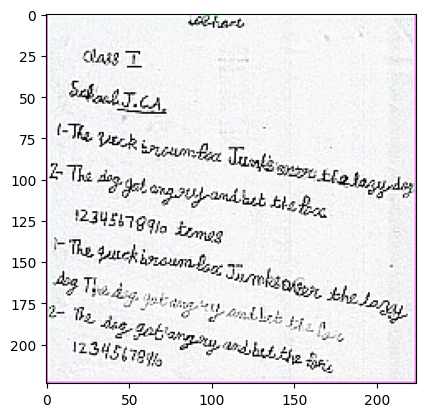

In [17]:
plt.imshow(trainX[126,:])
plt.show()

**VGG16 Model**


**Data Augmentation**

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.models import Model
# data augmentation
datagen = ImageDataGenerator(
#        featurewise_center=False,  # set input mean to 0 over the dataset
#        samplewise_center=False,  # set each sample mean to 0
#        featurewise_std_normalization=False,  # divide inputs by std of the dataset
#        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        #rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        #horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(trainX)



datagen.fit(valX)

**Transfer Learning using VGG16 (Imagenet)**

In [26]:
from tensorflow.keras.applications import VGG16

conv_base=VGG16(weights='imagenet',
                include_top=False,##we only want to use "conv" base
                input_shape=(224,224,3))

In [20]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# def create_model():
#     inp= Input((224,224,3))
#     po1=conv_base(inp)
#     x=Flatten()(po1)
#     x=Dense(16384,activation='relu')(x)
#     y=Dense(8192,activation='relu')(x)
#     y=Dense(4096,activation='relu')(y)
#     y=Dense(2048,activation='relu')(y)
#     y=Dense(1024,activation='relu')(y)
#     z=Dense(512,activation='relu')(y)
#     a=Dense(256,activation='relu')(z)
#    # skip1=Add()([y,a])
#     l1=Dense(128,activation='relu')(a)
#     l2=Dense(64,activation='relu')(l1)
#     l3=Dense(1,activation='relu')(l2)
#     model=Model(inputs=inp,outputs=l3)
#     return model


In [21]:
#model_3=create_model()
model_3=Sequential()

model_3.add(conv_base)
model_3.add(Flatten())
model_3.add(Dense(512,activation='relu'))
model_3.add(Dense(128,activation='relu'))
model_3.add(Dense(64,activation='relu'))
model_3.add(Dense(8,activation='LeakyReLU'))
model_3.add(Dense(1,activation='sigmoid'))

In [22]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 8)                 520       
                                                                 
 dense_4 (Dense)             (None, 1)                 9

In [23]:
from tensorflow.keras.optimizers import RMSprop, Adam
import tensorflow as tf
#from tensorflow_addons.optimizers import AdamW
from tensorflow.keras.optimizers import SGD
opt = Adam(lr=0.0001)
model_3.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [24]:
history_VGG=model_3.fit(
   datagen.flow(trainX,trainY, batch_size=32),
                              epochs = 20, validation_data =(valX, valY)

)

Epoch 1/20
58/58 [==============================] - 72s 742ms/step - loss: 53.0151 - accuracy: 0.9138 - val_loss: 0.2250 - val_accuracy: 0.9559
Epoch 2/20
58/58 [==============================] - 33s 555ms/step - loss: 0.1663 - accuracy: 0.9569 - val_loss: 0.1916 - val_accuracy: 0.9559
Epoch 3/20
58/58 [==============================] - 34s 579ms/step - loss: 0.1795 - accuracy: 0.9569 - val_loss: 0.1814 - val_accuracy: 0.9559
Epoch 4/20
58/58 [==============================] - 33s 565ms/step - loss: 0.1409 - accuracy: 0.9569 - val_loss: 0.1415 - val_accuracy: 0.9608
Epoch 5/20
58/58 [==============================] - 32s 551ms/step - loss: 0.1333 - accuracy: 0.9569 - val_loss: 0.1511 - val_accuracy: 0.9559
Epoch 6/20
58/58 [==============================] - 33s 569ms/step - loss: 0.1270 - accuracy: 0.9569 - val_loss: 0.1568 - val_accuracy: 0.9559
Epoch 7/20
58/58 [==============================] - 34s 577ms/step - loss: 0.1580 - accuracy: 0.9531 - val_loss: 0.2225 - val_accuracy: 0.960

In [27]:
trainY[1000]

0

In [28]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
scores = model_3.evaluate(valX, valY)
print("\nLoss: %.2f%%" % (scores[0]*100))

7/7 [==============================] - 1s 108ms/step - loss: 0.1514 - accuracy: 0.9559

Loss: 15.14%


In [29]:

acc = history_VGG.history['accuracy']
val_acc = history_VGG.history['val_accuracy']

loss = history_VGG.history['loss']
val_loss = history_VGG.history['val_loss']

In [30]:
print(len(loss),len(val_loss))

20 20


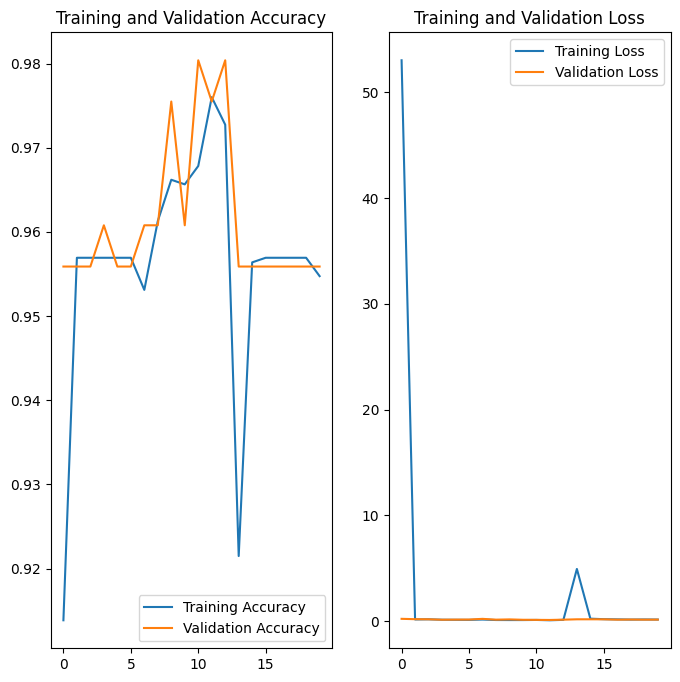

In [31]:
EPOCHS=20
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

7/7 [==============================] - 1s 120ms/step
Accuracy: 0.9558823529411765
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       195
           1       0.00      0.00      0.00         9

    accuracy                           0.96       204
   macro avg       0.48      0.50      0.49       204
weighted avg       0.91      0.96      0.93       204

0.0
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


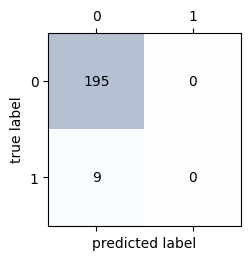

<Axes: >

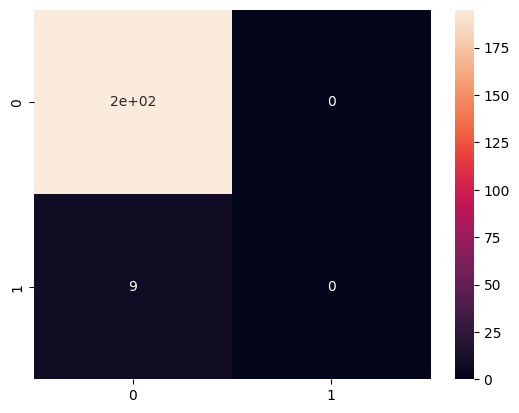

In [32]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
# Model Accuracy, how often is the classifier correct?
predictions = model_3.predict(valX)

predictions = predictions>0.5
#print(predictions)
from sklearn.metrics import classification_report
print("Accuracy:",metrics.accuracy_score(valY, predictions))
print(classification_report(valY, predictions))
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=valY, y_pred=predictions)
sensitivity = recall_score(valY, predictions)
print(sensitivity)
specificity=confmat[0][0]/ (confmat[0][0] + confmat[0][1])
print(specificity)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
     ax.text(x=j, y=i,s=confmat[i, j],va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
import seaborn as sns
sns.heatmap(confmat, annot=True)

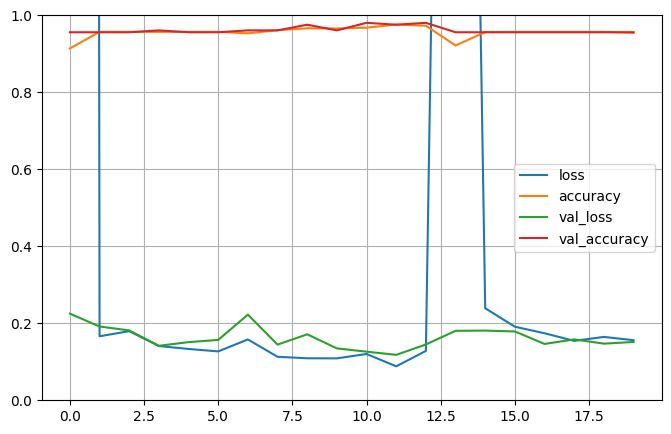

In [33]:
import pandas as pd
pd.DataFrame(history_VGG.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [34]:
scores = model_3.evaluate(testX, testY)
print(scores)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

8/8 [==============================] - 2s 307ms/step - loss: 0.1551 - accuracy: 0.9559
[0.15511468052864075, 0.9559471607208252]

Accuracy: 95.59%


In [65]:
import pickle

modelx=pickle.load(open('Layer_max.pkl','rb'))

In [58]:
modelx.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 8)                 520       
                                                                 
 dense_4 (Dense)             (None, 1)                 9

In [69]:
modelx.pop()
#model2=Model(modelx.input,modelx.layers[-1].ouput)

In [70]:
modelx.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 8)                 520       
                                                                 
Total params: 27634696 (105.42 MB)
Trainable params: 276

In [71]:
!pip3 install pytesseract

In [72]:
!apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 32 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,227 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121730 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [73]:
import pytesseract
import pandas as pd

In [74]:
def prepro_angle(img):
    filtered_image= cv2.bilateralFilter(img, 5, 50, 50)
    ret,threshold_img=cv2.threshold(filtered_image,140,255,cv2.THRESH_BINARY)
    element=np.ones((2,2),np.uint8)
    threshold_img=cv2.erode(threshold_img,element)
    return threshold_img

def prepro_space(img):
    filtered_image= cv2.bilateralFilter(img, 5, 50, 50)
    ret,threshold_img=cv2.threshold(filtered_image,135,255,cv2.THRESH_BINARY_INV)
    return threshold_img

def prepro_pressure(img):
    inverted=255-img
    bilateral = cv2.bilateralFilter(inverted, 5, 50, 50)
    ret,thresh=cv2.threshold(bilateral,110,255,cv2.THRESH_TOZERO)
    return thresh

In [75]:
def line_spacing(threshold_img):
    letter_size=average_letter_size=var_letter_size=0
    TOP_MARGIN=LINE_SPACING=WORD_SPACING=0.0
    lines=list()
    def horizontal_projection ()->list:
        (h,w)=np.shape(threshold_img)
        print(h,w)
        sum_rows=list()
        for j in range (0,h-1):
            row=threshold_img[j:j+1,0:w]
            sum_rows.append(np.sum(row))
        return sum_rows
    hplist=horizontal_projection()

    topMargincount=0
    for sum in hplist:
        if(sum<=255):
            topMargincount=topMargincount+1
        else:
            break
    lineTop=0
    lineBottom=0
    spaceTop=0
    SpaceBottom=0
    setLineTop=True
    setSpaceTop=True
    includeNextSpace=True
    space_zero=list()
    for i in range(0,len(hplist)):
        if hplist[i]<3000:
            if setSpaceTop:
                spaceTop=i
                setSpaceTop=False
            SpaceBottom=i+1
            if i<len(hplist)-1:
                if(hplist[i+1]<3000):
                    continue
            if includeNextSpace:
                space_zero.append(SpaceBottom-spaceTop)
            else:
                previous=0
                if(len(space_zero)==0):
                    previous=0
                else:
                    previous=space_zero.pop()
                space_zero.append(previous+SpaceBottom-lineTop)
            setSpaceTop=True
        if hplist[i]>3000:
            if setLineTop:
                lineTop=i
                setLineTop=False
            lineBottom=i+1
            if i<len(hplist)-1:
                if hplist[i+1]>3000:
                    continue
                if(lineBottom-lineTop<20):
                    includeNextSpace=False
                    setLineTop=True
                    continue
            includeNextSpace=True
            lines.append([lineTop,lineBottom])
            setLineTop=True
    threshold=15000
    new_space_row_count=0
    total_row_count=0
    total_line_count=0
    flag=False
    for i,line in enumerate(lines):
        segment=hplist[line[0]:line[1]]
        for j,sum in enumerate(segment):
            if sum<threshold:
                new_space_row_count=new_space_row_count+1
            else:
                total_row_count=total_row_count+1
                flag=True
        if flag:
            total_line_count=total_line_count+1
            flag=False
    total_space_row_count=new_space_row_count+np.sum(space_zero[1:-1])
    #average_line_spacing=float(total_space_row_count)/total_line_count
    var_line_spacing=new_space_row_count
    if(len(space_zero)!=0 and len(space_zero)<=2):

       var_line_spacing=var_line_spacing+space_zero[-1];
    elif(len(space_zero)>2):
        var_line_spacing=var_line_spacing+ np.var(space_zero[1:-1])

    return var_line_spacing






In [76]:
def pen_pressure(img):
    element=np.ones((3,3),np.uint8)
    skel=np.zeros(np.shape(img),np.uint8)
    original_variance=np.var(img)
    while True:
        open=cv2.erode(img,element)
        temp=img-open
        eroded=cv2.erode(img,element)
        skel=np.bitwise_or(skel,temp)
        img=eroded
    # print('a')
        if(np.all(img==0)):
            break

    thinned=np.var(skel)
    pres=original_variance-thinned
    return pres


In [77]:
def slant_angle(threshold_img):
    def getVerticalProjectionProfile(image):

    # Convert black spots to ones
    #image[image == 0]   = 1
    # Convert white spots to zeros
        image[image == 255] = 1

        vertical_projection = np.sum(image, axis = 0)

        return vertical_projection
    s_function=np.zeros(9,np.float64)
    count_=np.zeros(9,np.uint64)
    data=pytesseract.image_to_data(threshold_img,output_type='dict')
    boxes = len(data['level'])
    words=[]
    for i in range(boxes ):
        words.append((data['left'][i], data['top'][i], data['width'][i], data['height'][i]))
    angles=[ -45,-30, -15, -5, 0, 5, 15, 30,45]
    for i in range (0,9):
        angle=angles[i]
        s_temp=0.0
        count=0
        for word in words:
            (x,y,w,h)=word
        #   if(x<0 or y<0):
        #      continue
            if(h<20 or w<20):
                continue
        #   if(w<0):
        #      print(w)
            original=threshold_img[x:x+h,y:y+w]
            shift=(np.tan(angle*np.pi/180)*h)/2
            pad_length=abs(int(shift))
        #   if(pad_length<0):
        #    print(pad_length)
            x=int(h)
            y=int(w+pad_length*2)
            if(x<=0 or y<=0):
                continue
            blank_image=np.zeros((int(x),int(y),3),np.uint8)
            new_image=cv2.cvtColor(blank_image,cv2.COLOR_BGR2GRAY)
        #   if(y<w):
        #      print(y,w)
            if(w!=np.shape(original)[1] or h!=np.shape(original)[0]):
                continue
            new_image[:,pad_length:w+pad_length]=original
            (h,w)=np.shape(new_image)[:2]
            x1=w/2
            y1=0
            x2=w/4
            y2=h
            x3=3*w/4
            y3=h
            pts1=np.float32([[x1,y1],[x2,y2],[x3,y3]])
            pts2=np.float32([[x1+shift,y1],[x2-shift,y2],[x3-shift,y3]])
            M = cv2.getAffineTransform(pts1, pts2)
            deslanted=cv2.warpAffine(new_image,M,(w,h))
            #print(deslanted)
            vp=getVerticalProjectionProfile(deslanted.copy())
            #print(vp)
            for vpk in vp:
                if(vpk==0):
                 continue
                num_fgpixel=vpk
            # print(num_fgpixel,h)
                if num_fgpixel<h/3:
                 continue

                s_temp=s_temp+num_fgpixel/h
                count=count+1
        if(count==0):
         continue

        s_function[i]=s_function[i]+s_temp/count
        count_[i]=count_[i]+1
    index_max=np.argmax(s_function)
    SLANT_ANGLE=angles[index_max]
    return SLANT_ANGLE


In [78]:
def baseline_angle(dilated_img):
    contours, hierarchy = cv2.findContours(dilated_img,
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    angle_list=list()
    for ctr in contours:
            center,dim,angle=cv2.minAreaRect(ctr)
            if(dim[1]<20): #as paper asked to ignore boxes with height less than 20 pixels
             continue
            if angle>80:
                angle=90-angle
            elif angle<-45:
                angle=angle+90
            angle_list.append(angle)
    baseline_angle=np.var(angle_list)
    return baseline_angle


In [86]:
cols=['Pen Pressure', 'Line Spacing','Slant Angle', 'Baseline angle','Category','Link','l1','l2','l3','l4','l5','l6','l7','l8']
features=pd.DataFrame(columns=cols )

In [87]:
c = 0 ## to see the progress
for image in imagePaths:

    lable = os.path.split(image)[1].split('_')[-1].split('.')[0]

    if(lable!="yes" and lable!="no"):
        continue
    val=bool(0)
    if(lable=="yes"):
        val=bool(1)

    #im_gray = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    img=Image.open(image)
    imf=cv2.imread(image)

    imf=cv2.cvtColor(imf,cv2.COLOR_BGR2GRAY)
    imf=cv2.resize(imf,(900,900))
    img_ang=prepro_angle(imf)
    lst=[pen_pressure(prepro_pressure(imf)),line_spacing(prepro_space(imf)),slant_angle(img_ang),baseline_angle(img_ang),val,image]

    # img = cv2.imread(image)
    img=img.resize((224,224))
    enhancer = ImageEnhance.Sharpness(img.convert('RGB'))
    img=enhancer.enhance(10)
    #print(img.shape)
   # img = cv2.resize(img, (1024,1024))
    #img = img.reshape(224,224,1)
   # img = filters.sobel(img )
    img=np.array(img)
    img=np.reshape(img,(1,224,224,3))
    # print(img.shape)
    lst=np.concatenate((lst,modelx.predict(img)[0]))
    features.loc[len(features.index)]=lst
    c=c+1
    print(c)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 19ms/step
599
900 900
1/1 [==============================] - 0s 20ms/step
600
900 900
1/1 [==============================] - 0s 18ms/step
601
900 900
1/1 [==============================] - 0s 20ms/step
602
900 900
1/1 [==============================] - 0s 19ms/step
603
900 900
1/1 [==============================] - 0s 19ms/step
604
900 900
1/1 [==============================] - 0s 19ms/step
605
900 900
1/1 [==============================] - 0s 19ms/step
606
900 900
1/1 [==============================] - 0s 27ms/step
607
900 900
1/1 [==============================] - 0s 19ms/step
608
900 900
1/1 [==============================] - 0s 19ms/step
609
900 900
1/1 [==============================] - 0s 19ms/step
610
900 900
1/1 [==============================] - 0s 31ms/step
611
900 900
1/1 [==============================] - 0s 30ms/step
612
900 900
1/1 [==============================] - 0s 19ms/step
6

In [88]:
features.to_csv('feature_layers.csv',header=True,index=False)

In [85]:
ix=cv2.imread('/content/drive/MyDrive/datad/Dysgraphia/dysgraphia_100_yes.jpg');
ix=cv2.resize(ix,(224,224))
ix=np.reshape(ix,(1,224,224,3))
print(modelx.predict(ix)[0])

1/1 [==============================] - 0s 69ms/step
[-1.7240189   2.9620957  -1.1968141  -2.855291   -0.60055465 -2.295303
 -3.0268342   1.5355648 ]
